In [ ]:
import demes
import demesdraw
import matplotlib.pyplot as plt

N_e = 100

b = demes.Builder(
    time_units="generations",
    generation_time=25,
)
b.add_deme("a0", epochs=[dict(end_time=19, start_size=N_e)])
b.add_deme("a1", ancestors=["a0"], epochs=[dict(end_time=140e3, start_size=N_e)])
b.add_deme("OOA", ancestors=["AMH"], epochs=[dict(end_time=21.2e3, start_size=2100)])
b.add_deme("YRI", ancestors=["AMH"], epochs=[dict(start_size=12300)])
b.add_deme("CEU", ancestors=["OOA"], epochs=[dict(start_size=1000, end_size=29725)])
b.add_deme("CHB", ancestors=["OOA"], epochs=[dict(start_size=510, end_size=54090)])
b.add_migration(demes=["YRI", "OOA"], rate=25e-5)
b.add_migration(demes=["YRI", "CEU"], rate=3e-5)
b.add_migration(demes=["YRI", "CHB"], rate=1.9e-5)
b.add_migration(demes=["CEU", "CHB"], rate=9.6e-5)

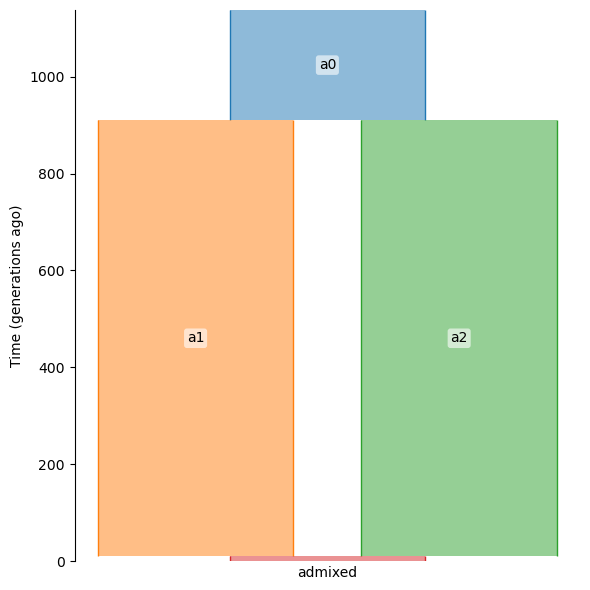

In [66]:
import demes
import demesdraw
import matplotlib.pyplot as plt

g = demes.loads("""
time_units: generations
demes:
  - name: a0
    epochs:
      - end_time: 910
        start_size: 100
  - name: a1
    ancestors: [a0]
    start_time: 910
    epochs:
      - end_time: 10
        start_size: 100
  - name: a2
    ancestors: [a0]
    start_time: 910
    epochs:
      - end_time: 10
        start_size: 100
  - name: admixed
    ancestors: [a1, a2]
    proportions: [0.5, 0.5]
    start_time: 10
    epochs:
      - start_size: 100
""")

fig, ax = plt.subplots(figsize=(6, 6))
demesdraw.tubes(g, ax=ax, log_time=False)
ax.set_ylabel("Time (generations ago)")
plt.tight_layout()
plt.show()

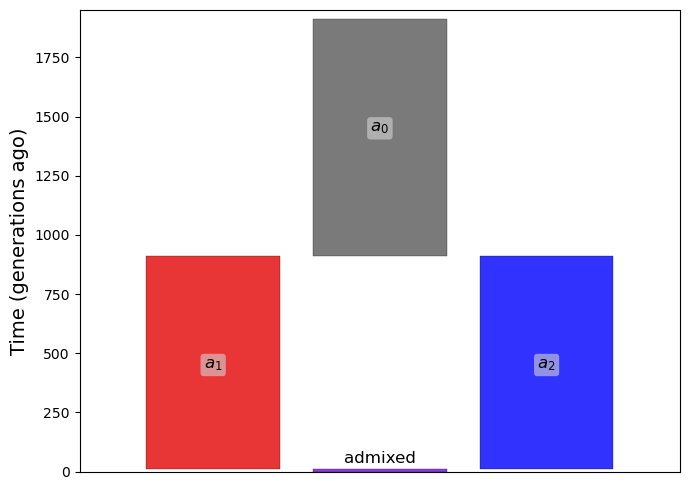

In [9]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.patches import Rectangle
from matplotlib.path import Path
import matplotlib.patches as patches

fig, ax = plt.subplots(figsize=(7, 5))

# --- Populations (equal sizes) ---
width = 0.4
color_a0 = "#7A7A7A"
color_a1 = "#E83636"
color_a2 = "#3232FF"
color_admix = "#9733F5"

# a0: 1910 → 910
ax.add_patch(Rectangle((0.8 - width/2, 910), width, 1000,
                       facecolor=color_a0, edgecolor="black", lw=0.2))
# a1: 910 → 10
ax.add_patch(Rectangle((0.3 - width/2, 10), width, 900,
                       facecolor=color_a1, edgecolor="black", lw=0.2))
# a2: 910 → 10
ax.add_patch(Rectangle((1.3 - width/2, 10), width, 900,
                       facecolor=color_a2, edgecolor="black", lw=0.2))
# admix: 10 → 0
ax.add_patch(Rectangle((0.8 - width/2, 0), width, 10,
                       facecolor=color_admix, edgecolor="black", lw=0.2))



# --- Labels ---
ax.text(0.8, 1450, "$a_0$", ha="center", va="center", fontsize=12,
        bbox=dict(facecolor="lightgrey", alpha=0.6, edgecolor="none", boxstyle="round,pad=0.2"))
ax.text(0.3, 450, "$a_1$", ha="center", va="center", fontsize=12,
        bbox=dict(facecolor="lightgrey", alpha=0.6, edgecolor="none", boxstyle="round,pad=0.2"))
ax.text(1.3, 450, "$a_2$", ha="center", va="center", fontsize=12,
        bbox=dict(facecolor="lightgrey", alpha=0.6, edgecolor="none", boxstyle="round,pad=0.2"))
ax.text(0.8, 25, "admixed", ha="center", va="bottom", fontsize=12)

# --- Aesthetics ---
ax.set_xlim(-0.1, 1.7)
ax.set_ylim(0, 1950)
ax.set_xticks([])
ax.set_ylabel("Time (generations ago)", fontsize=14)
plt.tight_layout()
plt.show()